In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

full_df = pd.read_csv('full_hdb.csv')

full_df = full_df.dropna()

full_df = full_df.reset_index()

In [143]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19730 entries, 0 to 19729
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      19730 non-null  int64  
 1   Unnamed: 0                 19730 non-null  int64  
 2   floor_area_sqm             19730 non-null  float64
 3   lat                        19730 non-null  float64
 4   lease_commence_date        19730 non-null  int64  
 5   lng                        19730 non-null  float64
 6   minMrt_transitTime         19730 non-null  float64
 7   minMrt_walkDistance        19730 non-null  float64
 8   minMrt_walkTime            19730 non-null  float64
 9   minPrimary_transitTime     19730 non-null  float64
 10  minPrimary_walkDistance    19730 non-null  float64
 11  minPrimary_walkTime        19730 non-null  float64
 12  min_dis_mrt_euclidean      19730 non-null  float64
 13  min_dis_primary_euclidean  19730 non-null  flo

In [144]:
# calculte the price / sqm

def set_price_perSqm(row):
    row['resale_price_per_sqm'] = row['resale_price'] / row['floor_area_sqm']

    return row

full_df = full_df.apply(set_price_perSqm, axis = 1)

full_df = full_df.drop(['resale_price', 'floor_area_sqm', 'Unnamed: 0', 'index'], axis = 1)

full_df.to_csv('full_hdb_perSqm.csv')

full_df

,lat,lease_commence_date,lng,minMrt_transitTime,minMrt_walkDistance,minMrt_walkTime,minPrimary_transitTime,minPrimary_walkDistance,minPrimary_walkTime,min_dis_mrt_euclidean,...,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN,resale_price_per_sqm
0,1.362005,1979,103.853880,451.0,1126.0,811.0,887.0,2192.0,1579.0,0.009097,...,False,False,False,False,False,False,False,False,False,6068.181818
1,1.367908,1977,103.847714,277.0,453.0,327.0,871.0,2692.0,1939.0,0.002827,...,False,False,False,False,False,False,False,False,False,6122.448980
2,1.366227,1978,103.850086,220.0,507.0,365.0,1231.0,2744.0,1976.0,0.003830,...,False,False,False,False,False,False,False,False,False,6363.636364
3,1.366227,1978,103.850086,220.0,507.0,365.0,1231.0,2744.0,1976.0,0.003830,...,False,False,False,False,False,False,False,False,False,6409.090909
4,1.374001,1986,103.836432,652.0,1658.0,1194.0,612.0,1634.0,1177.0,0.011506,...,False,False,False,False,False,False,False,False,False,6440.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,1.421558,2018,103.842782,521.0,1695.0,1220.0,736.0,1124.0,810.0,0.010624,...,False,False,False,False,False,False,False,False,True,6194.690265
19726,1.433784,2001,103.827490,664.0,1270.0,914.0,1142.0,1957.0,1409.0,0.008604,...,False,False,False,False,False,False,False,False,True,5454.545455
19727,1.434633,1985,103.835208,311.0,668.0,481.0,800.0,820.0,590.0,0.004970,...,False,False,False,False,False,False,False,False,True,4895.522388
19728,1.434831,1985,103.835814,383.0,750.0,540.0,856.0,740.0,533.0,0.005222,...,False,False,False,False,False,False,False,False,True,4552.238806


In [160]:
cor_df = full_df.corr()

<AxesSubplot:>

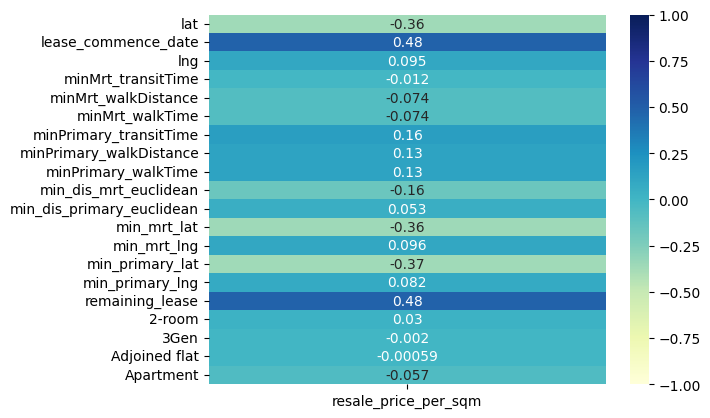

In [162]:
sns.heatmap(cor_df[['resale_price_per_sqm']].iloc[: 20], annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

<AxesSubplot:>

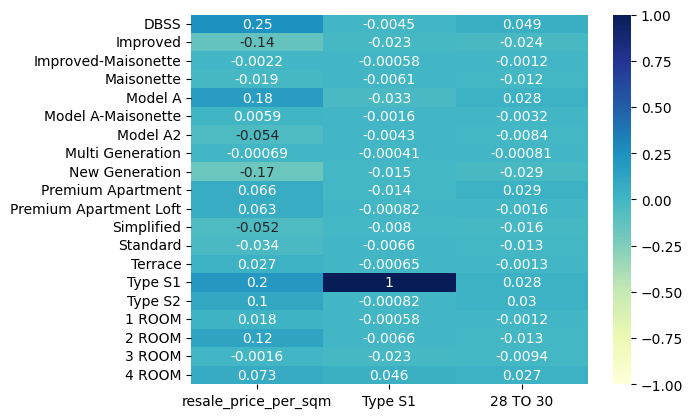

In [163]:
sns.heatmap(cor_df[['resale_price_per_sqm', 'Type S1', '28 TO 30']].iloc[20: 40], annot = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

<AxesSubplot:>

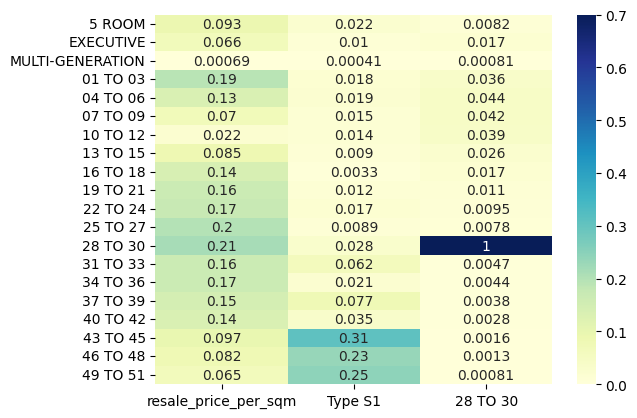

In [148]:
sns.heatmap(cor_df[['resale_price_per_sqm', 'Type S1', '28 TO 30']].iloc[40: 60], annot = True, cmap = 'YlGnBu', vmin = 0, vmax = 0.7)

<AxesSubplot:>

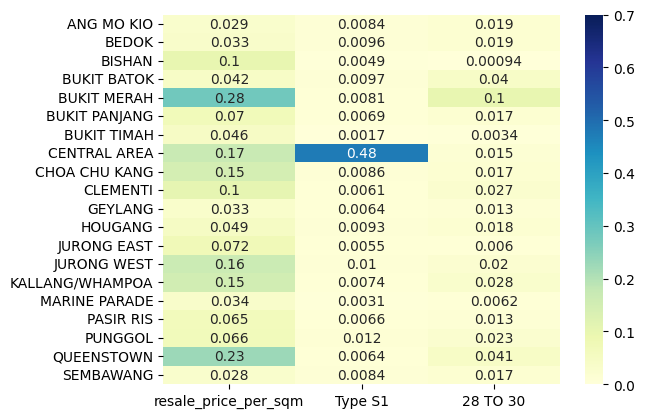

In [149]:
sns.heatmap(cor_df[['resale_price_per_sqm', 'Type S1', '28 TO 30']].iloc[60: 80], annot = True, cmap = 'YlGnBu', vmin = 0, vmax = 0.7)

<AxesSubplot:>

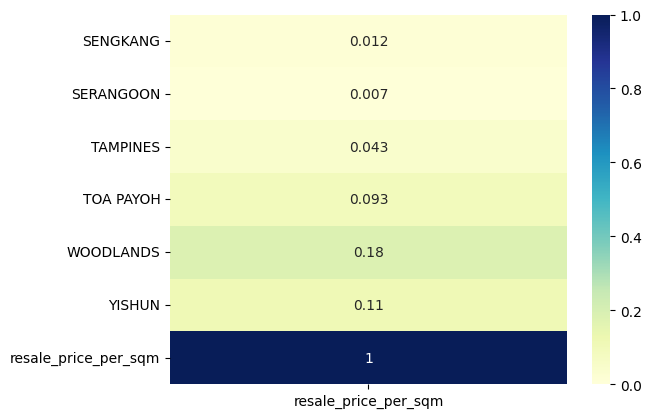

In [150]:
sns.heatmap(cor_df[['resale_price_per_sqm']].iloc[80: ], annot = True, cmap = 'YlGnBu', vmin = 0, vmax = 1)

In [151]:
condition = abs(cor_df['resale_price_per_sqm']) >= 0.1

correlated_col01 = cor_df.columns[condition]

correlated_col01 = list(correlated_col01)

correlated_col01.remove('resale_price_per_sqm')

print(correlated_col01)

['lat', 'lease_commence_date', 'minPrimary_transitTime', 'minPrimary_walkDistance', 'minPrimary_walkTime', 'min_dis_mrt_euclidean', 'min_mrt_lat', 'min_primary_lat', 'remaining_lease', 'DBSS', 'Improved', 'Model A', 'New Generation', 'Type S1', '2 ROOM', '01 TO 03', '04 TO 06', '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', 'BISHAN', 'BUKIT MERAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'JURONG WEST', 'KALLANG/WHAMPOA', 'QUEENSTOWN', 'WOODLANDS', 'YISHUN']


In [152]:
condition = abs(cor_df['resale_price_per_sqm']) >= 0.2

correlated_col01 = cor_df.columns[condition]

correlated_col01 = list(correlated_col01)

correlated_col01.remove('resale_price_per_sqm')

print(correlated_col01)

['lat', 'lease_commence_date', 'min_mrt_lat', 'min_primary_lat', 'remaining_lease', 'DBSS', '28 TO 30', 'BUKIT MERAH', 'QUEENSTOWN']


In [153]:
condition = abs(cor_df['resale_price_per_sqm']) >= 0.3

correlated_col03 = cor_df.columns[condition]

correlated_col03 = list(correlated_col03)

correlated_col03.remove('resale_price_per_sqm')
correlated_col03.remove('min_mrt_lat')
correlated_col03.remove('min_primary_lat')
correlated_col03.remove('remaining_lease')

print(correlated_col03)

['lat', 'lease_commence_date']


In [154]:
train = full_df.sample(frac = 0.7, random_state = 101) # training data set - build the model

test = full_df.drop(train.index) # testing data set - to test the efficiency of the model

trainY = train['resale_price_per_sqm'] # dependent variable - the variable we want to test
trainX = train[correlated_col01] # independent variable- the ones we include in model

testY = test['resale_price_per_sqm']
testX = test[correlated_col01] # must be the same cariables you put in the training model

model = LinearRegression().fit(trainX, trainY) # line of best fit

predY = model.predict(testX) # preduce predicted resale price calues for testing set
mae = mean_absolute_error(testY, predY) # find difference between each predicted and actual price, averaging them
print(mae) # goal is to reduce MAE to the minimum

655.1784582667685


In [155]:
train = full_df.sample(frac = 0.7, random_state = 101) # training data set - build the model

test = full_df.drop(train.index) # testing data set - to test the efficiency of the model

trainY = train['resale_price_per_sqm'] # dependent variable - the variable we want to test
trainX = train[correlated_col03] # independent variable- the ones we include in model

testY = test['resale_price_per_sqm']
testX = test[correlated_col03] # must be the same cariables you put in the training model

model = LinearRegression().fit(trainX, trainY) # line of best fit

predY = model.predict(testX) # preduce predicted resale price calues for testing set
mae = mean_absolute_error(testY, predY) # find difference between each predicted and actual price, averaging them
print(mae) # goal is to reduce MAE to the minimum

700.7092113734255


In [156]:
fig = px.scatter_mapbox(full_df, lat = 'lat', lon = 'lng', color = 'resale_price_per_sqm', 
                        color_continuous_scale = px.colors.cyclical.IceFire, size_max = 15, zoom = 10, 
                        mapbox_style = 'carto-positron')

fig.show()

In [158]:
fig = px.scatter(full_df, x = 'remaining_lease', y = 'resale_price_per_sqm')

fig.show()